### CS 457 - Homework Assignment 10: Clustering
### Shahzaib Amir (sa05578)
### Email Address: sa05578@st.habib.edu.pk

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('McDonaldsMenu.csv')

### 1. Need to clean the data. Remove columns Category and Item for clustering purpose
### 2. You may drop column Serving Size. If not, then you need to clean the values and get oz or g values and then remove the units.

In [7]:
cleaned_data = df.drop(['Category', 'Item', 'Serving Size'], axis = 1)


In [8]:
cleaned_data.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


### 3. Scale (normalize) the data before clustering.
### 4. Generate WSS (Knee Plot) to find optimal number of clusters. You can also plot Silhouette Coefficient plot to support your answer.
### 5. Perform K-Means clustering again with optimal number of clusters.
### 6. Visualize the clustering results.

In [13]:
## Scaling the data
scaler = MinMaxScaler()

##Transforming the data to pass it on for WSS Plot
cleaned_data_transformed = scaler.fit_transform(cleaned_data)

In [11]:
cleaned_data_transformed

260

In [47]:
### Finding optimum number of clusters for WSS Plot and K-means classification

wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(cleaned_data_transformed)
    wss.append(kmeans.inertia_)

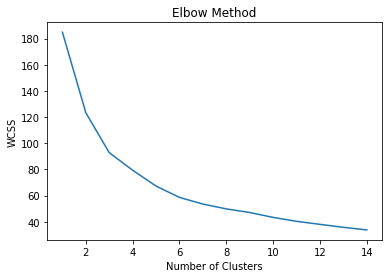

In [48]:
plt.plot(range(1, 15), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The WCSS value will begin to decrease as the number of clusters grows as the cluster square error starts to decrease. When K = 1, the WCSS value is the highest. When we examine the graph, we can see that it will change rapidly at a point, forming an elbow shape. The graph begins to move almost parallel to the X-axis and where the elbow shaped is formed that shows the optimal number of clusters for k-means, which is 3 in this case.


In [49]:
kmeans = KMeans(n_clusters = 3, max_iter = 500, random_state = 99)
predicted_val = kmeans.fit_predict(cleaned_data_transformed)
predicted_val

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### 7. Use cluster labels to your original dataset to create cluster specific data frames

Plotting Calories and Cholestrol

Text(0.5, 1.0, 'The actual dataset')

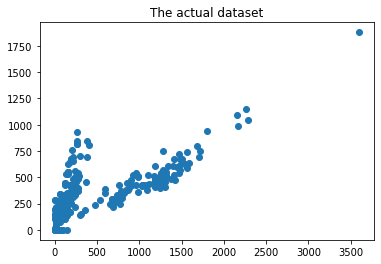

In [55]:
plt.scatter(x=cleaned_data.Sodium , y=cleaned_data.Calories)
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

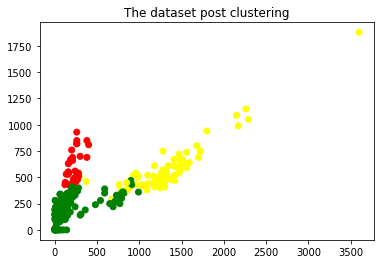

In [56]:
# Adding the colors 
color2 = np.array(['red','green','yellow'])
plt.scatter(x=cleaned_data.Sodium , y=cleaned_data.Calories, c=color2[kmeans.labels_])
plt.title("The dataset post clustering")

Visualizing Results

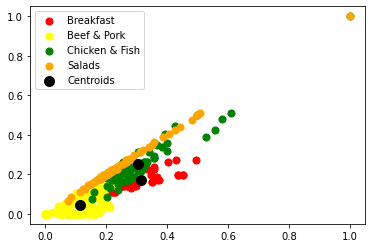

In [57]:
#Visualising the clusters
plt.scatter(cleaned_data_transformed[predicted_val == 0, 0], cleaned_data_transformed[predicted_val == 0, 1], s = 50, c = 'red', label = 'Breakfast')
plt.scatter(cleaned_data_transformed[predicted_val == 1, 0], cleaned_data_transformed[predicted_val == 1, 1], s = 50, c = 'yellow', label = 'Beef & Pork')
plt.scatter(cleaned_data_transformed[predicted_val == 2, 0], cleaned_data_transformed[predicted_val == 2, 1], s = 50, c = 'green', label = 'Chicken & Fish')
plt.scatter(cleaned_data_transformed[predicted_val == 2, 1], cleaned_data_transformed[predicted_val == 2, 2], s = 50, c = 'orange', label = 'Salads')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

## Centroids is one less since the data overlap thus would fall in the same category

plt.legend()

### 8. Generate at least 3 insights from your clustering results to show unique and interesting features for each cluster. Discuss your findings.
### 9. Can you suggest a unique name for each cluster? For example if a cluster is showing high Sugar level, then you can call it a “SugarLovers” cluster.

In [54]:
C1 = cleaned_data.iloc[predicted_val == 0, :]
C2 = cleaned_data.iloc[predicted_val == 1, :]
C3 = cleaned_data.iloc[predicted_val == 2, :]

In [61]:
C1['Sugars'].mean()



78.37837837837837

In [62]:
C2['Sugars'].mean()

27.5364238410596

In [63]:
C3['Sugars'].mean()

8.222222222222221

Out of the three C1 can be named as "Sugar Lovers" since the mean (78.4 g) is quite high

In [65]:
max(C1['Cholesterol'])

95

In [66]:
max(C2['Cholesterol'])

115

In [67]:
max(C3['Cholesterol'])

575

If your total cholesterol level is 200 to 239, you have a borderline level. The word “borderline” is used because levels of 200 to 239 are close to being high. A total cholesterol of 240 or above is a high level.

Therefore, cluster C3 has the highest cholesterol level which is dangerous while the other two clusters C1 and C2 have low cholesterol levels. We can name Cluster 3 as "Cholesterol Risky".

Reference: https://www.aafp.org/afp/2001/0115/p323.html#:~:text=If%20your%20total%20cholesterol%20level,you%20have%20a%20borderline%20level.

Most of the people who are on a diet are recommended by nutritionist to stay away from the edibles which have high Carbohydrates for example, Potato. Let's find out which cluster has the lowest Carbohydrates.

In [78]:
min(C1['Carbohydrates'])

55

In [80]:
min(C2['Carbohydrates'])

0

In [81]:
min(C3['Carbohydrates'])

22

In [82]:
max(C1['Carbohydrates'])

141

In [83]:
max(C2['Carbohydrates'])

79

In [84]:
max(C3['Carbohydrates'])

118

While there is no strict definition of a low-carb diet, anything under 100–150 grams per day is generally considered low-carb.

Reference: https://www.healthline.com/nutrition/5-most-common-low-carb-mistakes

Well it is pretty clear that all the least Carbohydrate value lies in Cluster 2 since its minimum value is 0g and maximum value is 79g. Therefore, we can name this Cluster as "Say No to Carbs Cluster"